# LDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(precision = 4)
sns.set() # all visualisations have things all seaborn uses 

from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('NHANES_age_prediction.csv')

In [3]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [20]:
# Check missing value


missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("NHANES_age_prediction.csv", na_values = missing_value_formats)

def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan

In [21]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [ ]:
#Check missing value with graph
import warnings
warnings.filterwarnings('ignore')

In [22]:
import missingno as msno

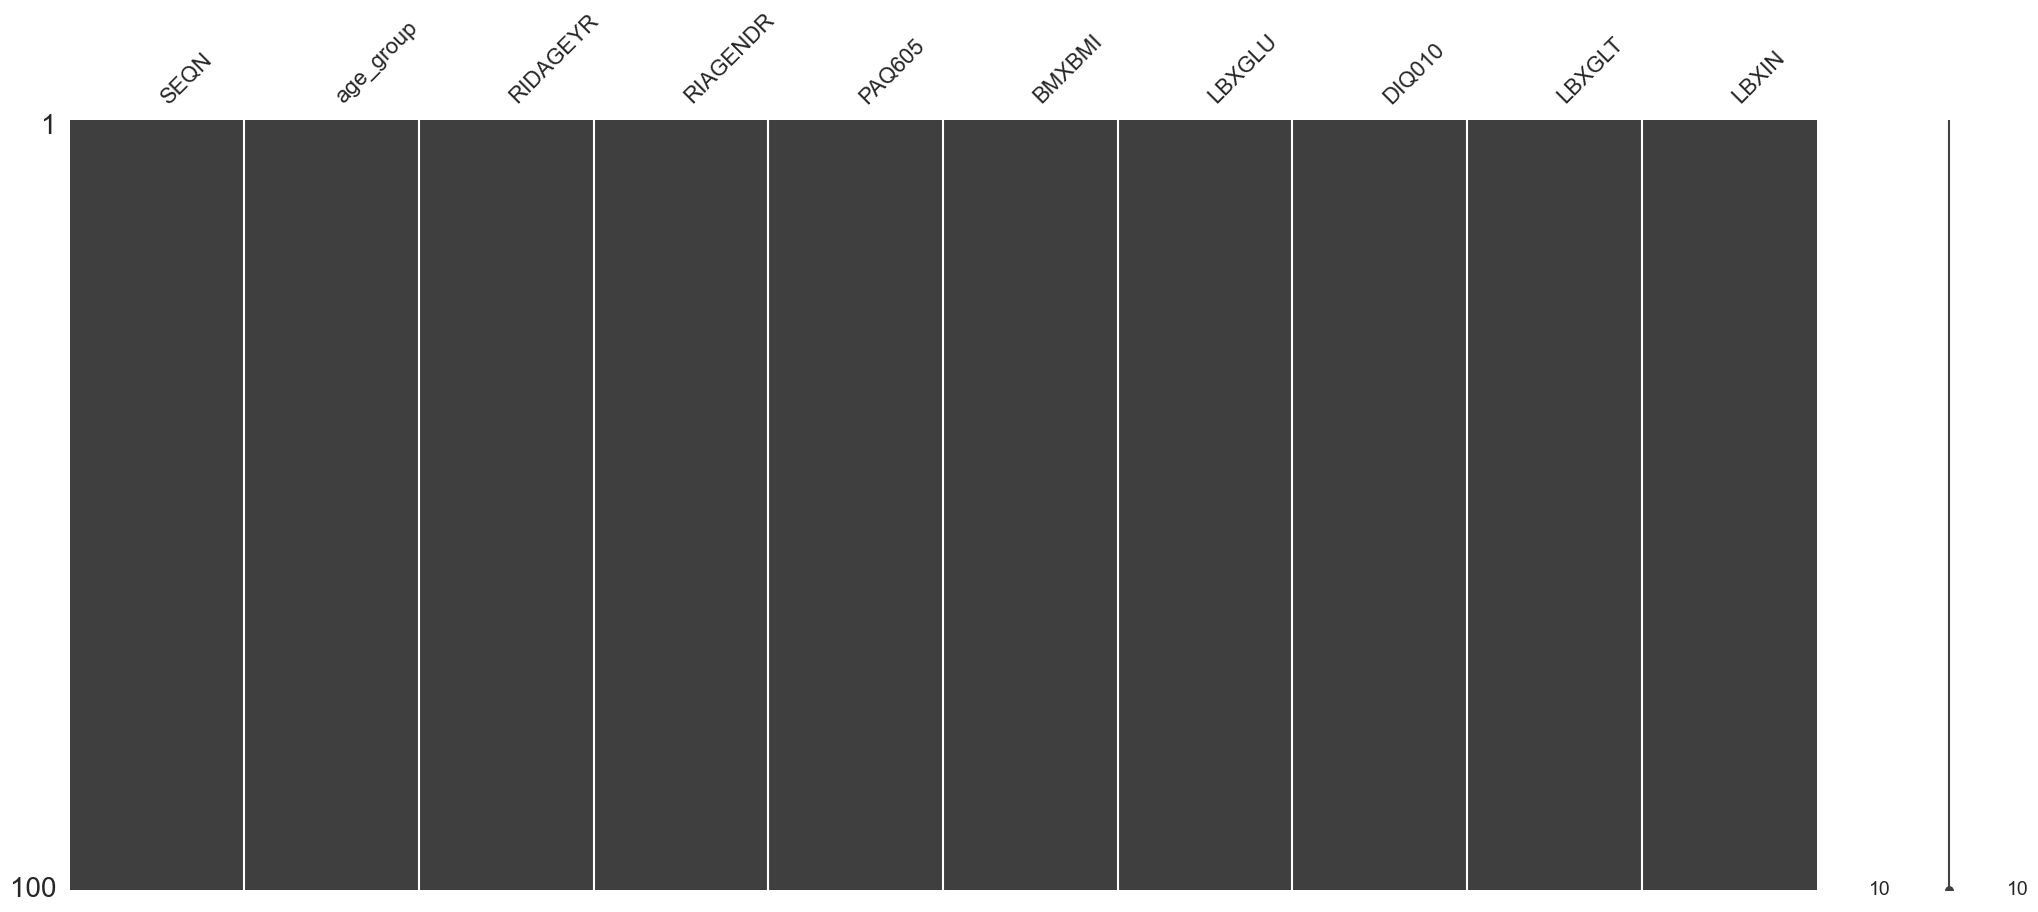

In [23]:
ax = msno.matrix(df.sample(100))

In [24]:
df.drop(['SEQN'], axis=1, inplace=True)

In [25]:
df.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [26]:
df.isnull().sum()

age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [27]:
# Assuming 'age_group' is the target variable
X = df.drop('DIQ010', axis=1)
y = df['DIQ010']

In [28]:
X.shape, y.shape

((2278, 8), (2278,))

In [29]:
y

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2273    2.0
2274    2.0
2275    2.0
2276    2.0
2277    2.0
Name: DIQ010, Length: 2278, dtype: float64

In [30]:
df.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
df.age_group = le.fit_transform(df_new.age_group)


I put the label Encoder code twice, because it was giving an error and after putting it back in the cell below, the code ran.

In [145]:
# Load your dataset, replace 'NHANES_age_prediction.csv' with the actual filename
df = pd.read_csv('NHANES_age_prediction.csv')

X = df.drop('DIQ010', axis=1)  # Assuming DIQ010 is the target variable
y = df['DIQ010']
target_names = df['DIQ010']

X_r_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
X_r_pca = PCA(n_components=2).fit_transform(X)

with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1, 2, figsize=[15, 6])
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[y == i, 0], X_r_pca[y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].set_title('LDA for NHANES dataset')
    axes[1].set_title('PCA for NHANES dataset')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')
    axes[0].legend()
    axes[1].legend()

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'Adult'

# Easy PCA

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Aplicar LabelEncoder nas colunas categóricas
label_encoder = LabelEncoder()
X['age_group'] = label_encoder.fit_transform(X['age_group'])

# Agora você pode tentar ajustar o modelo LDA novamente
lda = LinearDiscriminantAnalysis()
easy_lda = lda.fit_transform(X, y)

In [41]:
easy_lda 

array([[ 0.865 ,  0.4893],
       [-0.7758, -1.3348],
       [-1.1853, -0.6925],
       ...,
       [ 0.0142,  0.7507],
       [-0.2711,  0.1509],
       [-0.0582, -0.9658]])

In [42]:
lda.explained_variance_ratio_

array([0.9322, 0.0678])

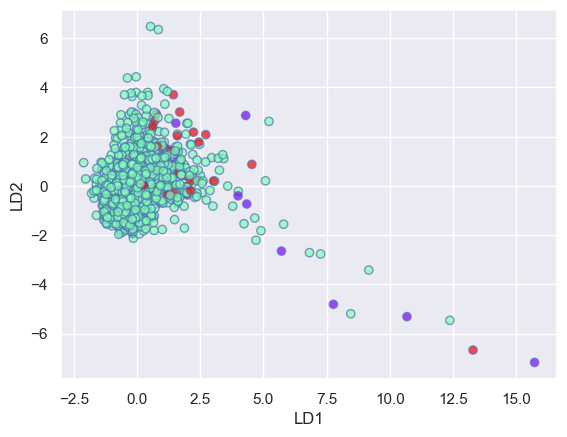

In [43]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    easy_lda[:,0],
    easy_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [56]:
# Set parameters
n_averages = 10
n_features_max = df.shape[1] - 1  # Exclude the target variable

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1)

for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    
    for _ in range(n_averages):
        # Select n_features columns randomly
        selected_features = np.random.choice(df.columns[:-1], size=n_features, replace=False)
        X = df[selected_features]
        y = df['DIQ010']
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # LDA with shrinkage
        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5).fit(X_train, y_train)
        score_clf1 += clf1.score(X_test, y_test)

        # LDA without shrinkage
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X_train, y_train)
        score_clf2 += clf2.score(X_test, y_test)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

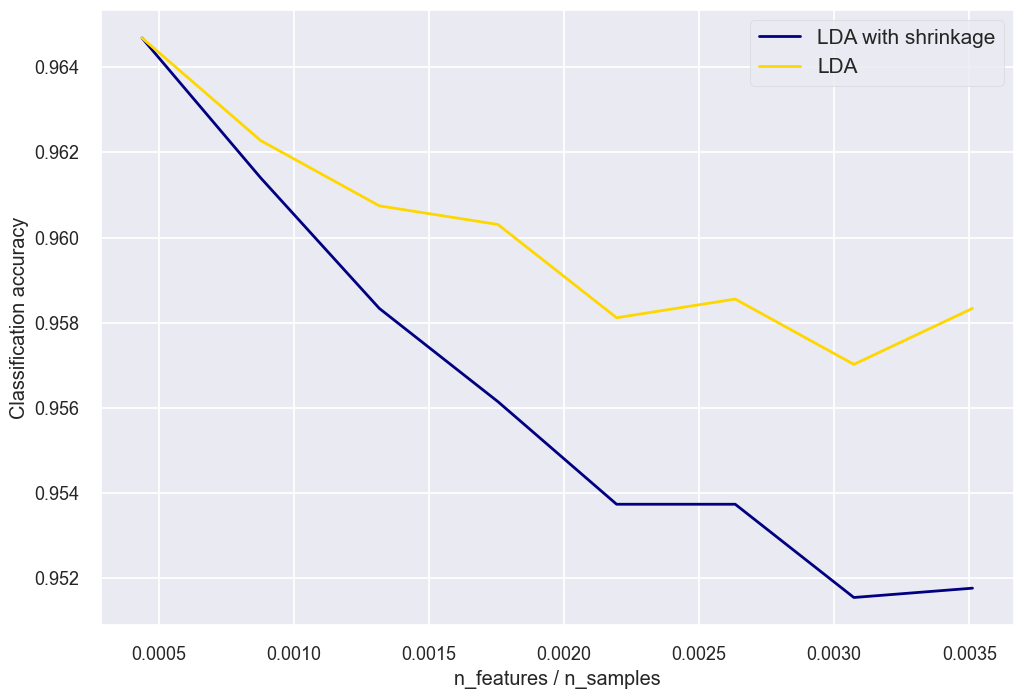

In [57]:
# Plotting
features_samples_ratio = np.array(n_features_range) / len(df)

with plt.style.context('seaborn-talk'):
    plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
             label="LDA with shrinkage", color='navy')
    plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
             label="LDA", color='gold')
    
    plt.xlabel('n_features / n_samples')
    plt.ylabel('Classification accuracy')
    plt.legend(prop={'size': 15})
    plt.tight_layout()
    plt.show()

# Testing LDA

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [45]:
pca.explained_variance_ratio_

array([0.7874, 0.1173])

In [46]:
X_pca

array([[ 39.3649, -13.2483],
       [-39.0474,   9.3092],
       [-51.7802,  17.6933],
       ...,
       [  8.5895,  10.3191],
       [ -6.7246, -20.1438],
       [ -7.2473,  14.0672]])

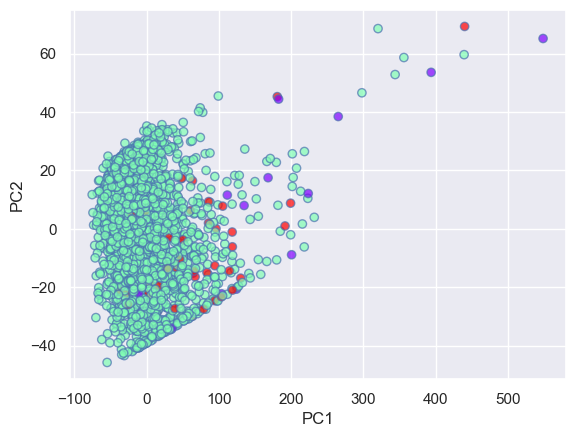

In [47]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

Tive varios erros antão apliquei novamente, assim o codigo correu

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Supondo que você já tenha feito o pré-processamento e ajustado o modelo LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  0,   4,   0],
       [  4, 530,  15],
       [  0,  15,   2]], dtype=int64)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=1)

In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  0,   3,   1],
       [  5, 527,  17],
       [  1,  15,   1]], dtype=int64)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(easy_lda, y, random_state=1)

In [53]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  0,   4,   0],
       [  4, 539,   6],
       [  0,  16,   1]], dtype=int64)

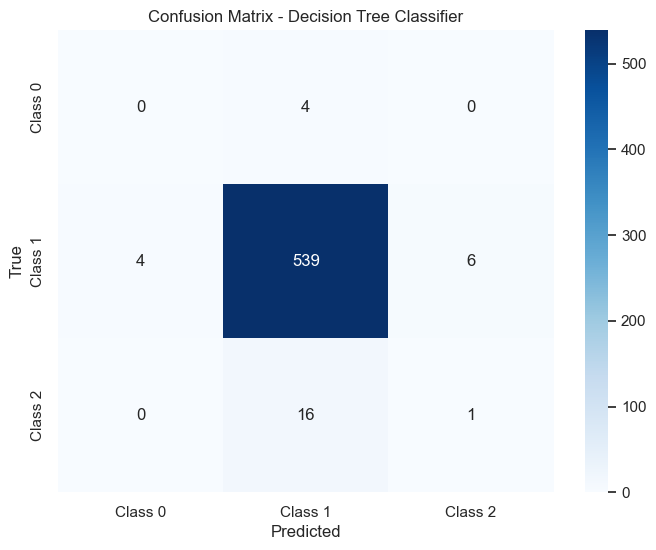

In [54]:
# Crie a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [ ]:
X.iloc[0]

# PCA

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [59]:
# Assuming "failure_no_label" is a subset of your dataframe without the label column
failure_no_label = df.drop('DIQ010', axis=1)

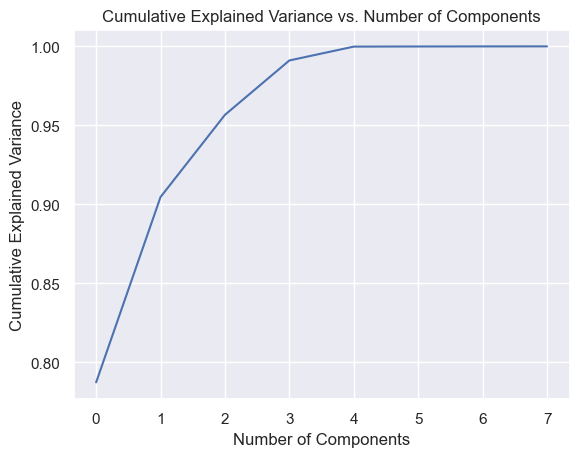

In [60]:
# Perform PCA
pca = PCA().fit(failure_no_label)

# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

This code uses the PCA class from scikit-learn to fit the PCA model on your data and then plots the cumulative explained variance. The x-axis represents the number of components, and the y-axis represents the cumulative explained variance. This plot can help you decide how many components to retain for your desired level of explained variance.

In [68]:
pca = PCA(4)
projected = pca.fit_transform(failure_no_label)

In [69]:
projected.shape

(2278, 4)

In [70]:
newfailure_df = pd.DataFrame(projected, columns =['F1', 'F2', 'F3', 'F4'])

In [71]:
newfailure_df.head()

,F1,F2,F3,F4
0,39.364935,-13.248331,2.069110,5.516297
1,-39.047395,9.309243,-2.911025,-9.224738
2,-51.780162,17.693345,0.926795,-6.594234
3,-29.519751,6.086783,13.394581,2.408945
4,-31.732745,-1.035038,13.490034,2.393234


In [72]:
newfailure_df['DIQ010'] = df['DIQ010']

In [74]:
newfailure_df.head()

,F1,F2,F3,F4,DIQ010
0,39.364935,-13.248331,2.069110,5.516297,2.0
1,-39.047395,9.309243,-2.911025,-9.224738,2.0
2,-51.780162,17.693345,0.926795,-6.594234,2.0
3,-29.519751,6.086783,13.394581,2.408945,2.0
4,-31.732745,-1.035038,13.490034,2.393234,2.0


In [75]:
df_array=newfailure_df.values 

In [76]:
from sklearn.model_selection import train_test_split
X = df_array[:,0:4]
y = df_array[:,2]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [111]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [112]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.97      0.99      0.98       664
         3.0       0.00      0.00      0.00        16

    accuracy                           0.96       684
   macro avg       0.32      0.33      0.33       684
weighted avg       0.94      0.96      0.95       684



In [113]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[  0   3   1]
 [  3 658   3]
 [  0  16   0]]
0.9619883040935673


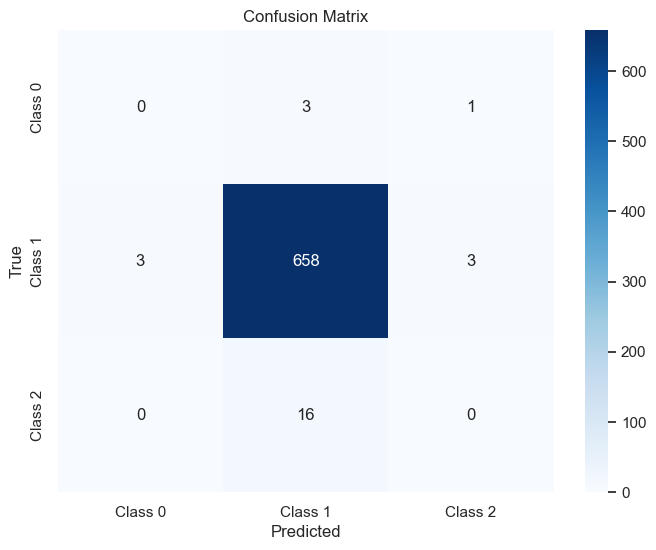

Accuracy: 0.9619883040935673


In [115]:
# Assuming you have the confusion matrix stored in the variable conf_matrix
conf_matrix = confusion_matrix(y_test, y_pred_default)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Printing accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_default))

[Text(0.5347222222222222, 0.9166666666666666, 'x[6] <= 217.0\ngini = 0.072\nsamples = 1594\nvalue = [17, 1535, 42]'),
 Text(0.3194444444444444, 0.75, 'x[5] <= 108.5\ngini = 0.051\nsamples = 1534\nvalue = [9, 1494, 31]'),
 Text(0.18055555555555555, 0.5833333333333334, 'x[4] <= 60.85\ngini = 0.028\nsamples = 1344\nvalue = [6, 1325, 13]'),
 Text(0.1111111111111111, 0.4166666666666667, 'x[6] <= 165.5\ngini = 0.027\nsamples = 1341\nvalue = [6, 1323, 12]'),
 Text(0.05555555555555555, 0.25, 'x[1] <= 58.5\ngini = 0.022\nsamples = 1291\nvalue = [4, 1277, 10]'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.012\nsamples = 1035\nvalue = [1, 1029, 5]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.061\nsamples = 256\nvalue = [3, 248, 5]'),
 Text(0.16666666666666666, 0.25, 'x[5] <= 89.0\ngini = 0.15\nsamples = 50\nvalue = [2, 46, 2]'),
 Text(0.1388888888888889, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.19444444444444445, 0.08333333333333

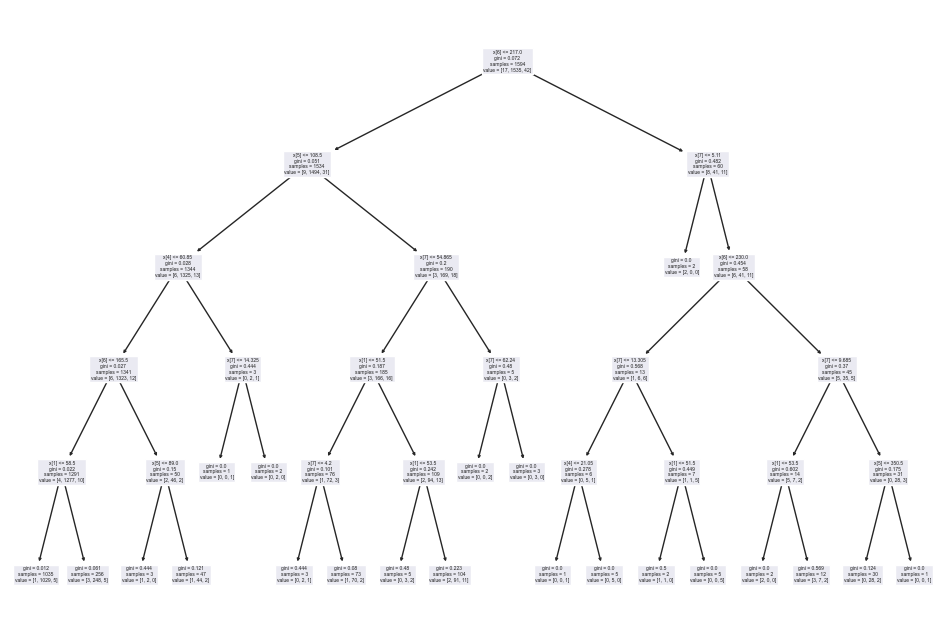

In [116]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default)

# Grid Search to Find Optimal Hyperparameters

In [117]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 2)},
             verbose=1)

In [118]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011011,0.002064,0.000000,0.000000,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.959248,0.949843,0.956113,0.956113,0.955975,0.955458,0.003066,1
1,0.008935,0.001948,0.001011,0.002023,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.946708,0.949843,0.943574,0.934169,0.946541,0.944167,0.005378,4
2,0.009972,0.004466,0.000000,0.000000,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",0.927900,0.946708,0.940439,0.940439,0.937107,0.938519,0.006151,6
3,0.008056,0.002442,0.001984,0.002431,entropy,11,"{'criterion': 'entropy', 'max_depth': 11}",0.924765,0.943574,0.931034,0.934169,0.930818,0.932872,0.006157,7
4,0.008995,0.003739,0.001002,0.002003,entropy,13,"{'criterion': 'entropy', 'max_depth': 13}",0.924765,0.934169,0.943574,0.934169,0.927673,0.932870,0.006491,8
5,0.005022,0.003099,0.001999,0.003997,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.956113,0.956113,0.956113,0.946708,0.955975,0.954204,0.003748,2
6,0.007932,0.003977,0.000000,0.000000,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.952978,0.940439,0.946708,0.946708,0.955975,0.948562,0.005428,3
7,0.005924,0.004903,0.001076,0.002151,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.940439,0.931034,0.937304,0.940439,0.955975,0.941038,0.008220,5
8,0.005527,0.002349,0.003296,0.002704,gini,11,"{'criterion': 'gini', 'max_depth': 11}",0.927900,0.924765,0.912226,0.931034,0.933962,0.925977,0.007531,9
9,0.008872,0.002398,0.000000,0.000000,gini,13,"{'criterion': 'gini', 'max_depth': 13}",0.927900,0.909091,0.905956,0.927900,0.943396,0.922849,0.013769,10


In [119]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9554582914374716
DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [120]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

0.9554582914374716

Running the model with best parameters obtained from grid search.

In [121]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=100)

In [122]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9532163742690059

[Text(0.6544449458483754, 0.95, 'x[6] <= 217.0\ngini = 0.072\nsamples = 1594\nvalue = [17, 1535, 42]'),
 Text(0.47134476534296027, 0.85, 'x[5] <= 108.5\ngini = 0.051\nsamples = 1534\nvalue = [9, 1494, 31]'),
 Text(0.3203971119133574, 0.75, 'x[4] <= 60.85\ngini = 0.028\nsamples = 1344\nvalue = [6, 1325, 13]'),
 Text(0.2509025270758123, 0.65, 'x[6] <= 165.5\ngini = 0.027\nsamples = 1341\nvalue = [6, 1323, 12]'),
 Text(0.1552346570397112, 0.55, 'x[1] <= 58.5\ngini = 0.022\nsamples = 1291\nvalue = [4, 1277, 10]'),
 Text(0.05776173285198556, 0.45, 'x[5] <= 93.5\ngini = 0.012\nsamples = 1035\nvalue = [1, 1029, 5]'),
 Text(0.02888086642599278, 0.35, 'x[6] <= 97.5\ngini = 0.023\nsamples = 428\nvalue = [0, 423, 5]'),
 Text(0.01444043321299639, 0.25, 'gini = 0.0\nsamples = 256\nvalue = [0, 256, 0]'),
 Text(0.04332129963898917, 0.25, 'x[6] <= 115.5\ngini = 0.056\nsamples = 172\nvalue = [0, 167, 5]'),
 Text(0.02888086642599278, 0.15, 'x[1] <= 33.5\ngini = 0.107\nsamples = 88\nvalue = [0, 83, 5]'),

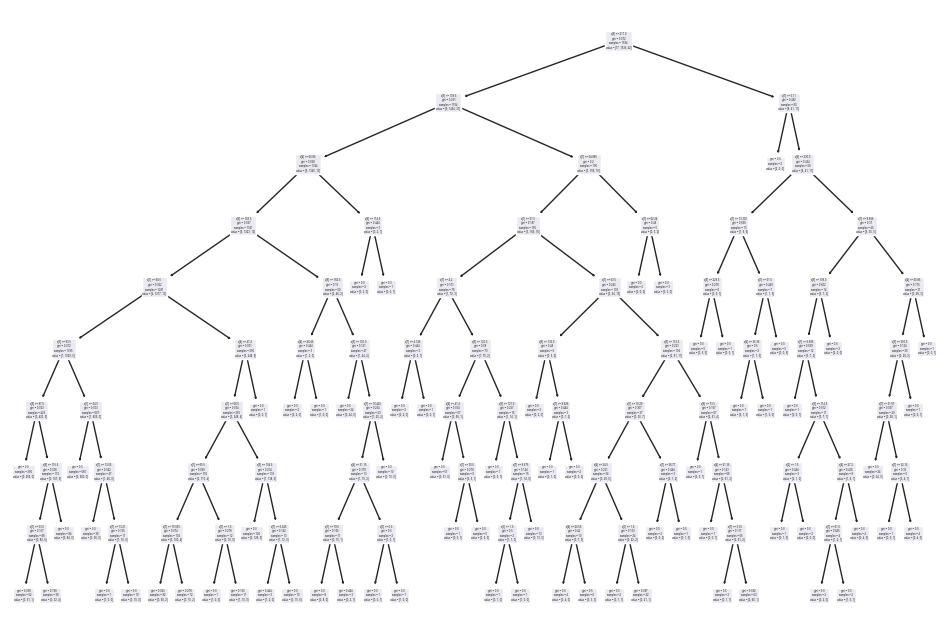

In [123]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

Reduzindo a árvore

In [124]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.9707602339181286


[Text(0.625, 0.875, 'x[6] <= 217.0\ngini = 0.072\nsamples = 1594\nvalue = [17, 1535, 42]'),
 Text(0.5, 0.625, 'x[5] <= 108.5\ngini = 0.051\nsamples = 1534\nvalue = [9, 1494, 31]'),
 Text(0.25, 0.375, 'x[6] <= 165.5\ngini = 0.028\nsamples = 1344\nvalue = [6, 1325, 13]'),
 Text(0.125, 0.125, 'gini = 0.023\nsamples = 1294\nvalue = [4, 1279, 11]'),
 Text(0.375, 0.125, 'gini = 0.15\nsamples = 50\nvalue = [2, 46, 2]'),
 Text(0.75, 0.375, 'x[1] <= 49.5\ngini = 0.2\nsamples = 190\nvalue = [3, 169, 18]'),
 Text(0.625, 0.125, 'gini = 0.134\nsamples = 70\nvalue = [1, 65, 4]'),
 Text(0.875, 0.125, 'gini = 0.235\nsamples = 120\nvalue = [2, 104, 14]'),
 Text(0.75, 0.625, 'gini = 0.482\nsamples = 60\nvalue = [8, 41, 11]')]

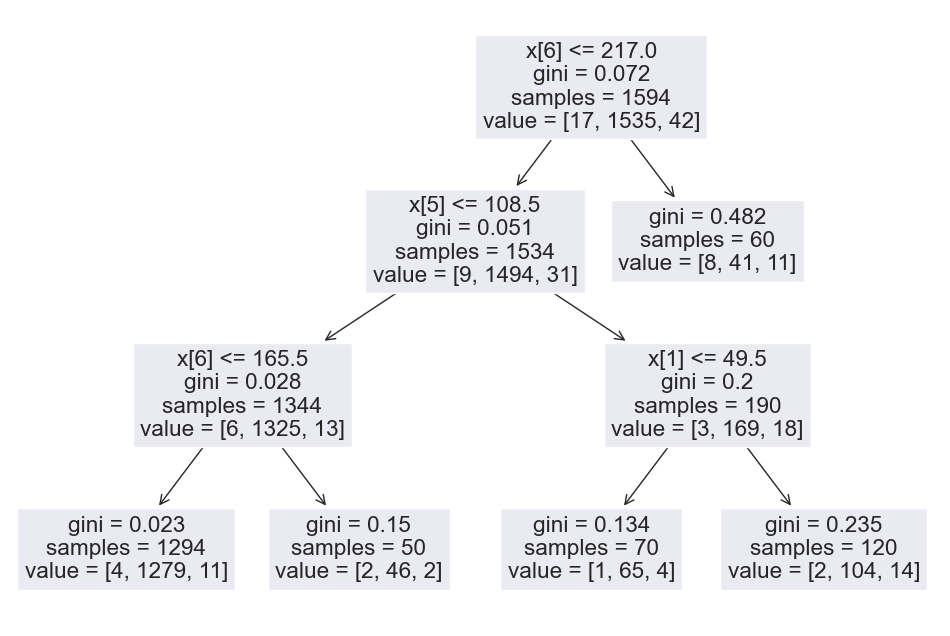

In [125]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

In [126]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.97      1.00      0.99       664
         3.0       0.00      0.00      0.00        16

    accuracy                           0.97       684
   macro avg       0.32      0.33      0.33       684
weighted avg       0.94      0.97      0.96       684



C:\Users\karik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[  0   4   0]
 [  0 664   0]
 [  0  16   0]]


Text(0.5, 1.0, 'Confusion Matrix')

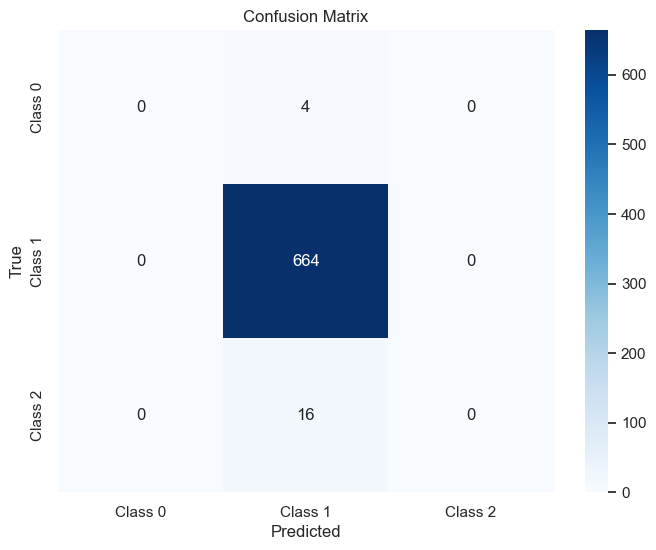

In [133]:
# Assuming you have the confusion matrix stored in the variable conf_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Comparison LDA and PCA

In [171]:
from sklearn.preprocessing import LabelEncoder

# Aplicar LabelEncoder nas colunas categóricas
label_encoder = LabelEncoder()
X['age_group'] = label_encoder.fit_transform(X['age_group'])


In [174]:
X.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,LBXGLT,LBXIN
0,0,61.0,2.0,2.0,35.7,110.0,150.0,14.91
1,0,26.0,2.0,2.0,20.3,89.0,80.0,3.85
2,0,16.0,1.0,2.0,23.2,89.0,68.0,6.14
3,0,32.0,1.0,2.0,28.9,104.0,84.0,16.15
4,0,38.0,2.0,1.0,35.9,103.0,81.0,10.92


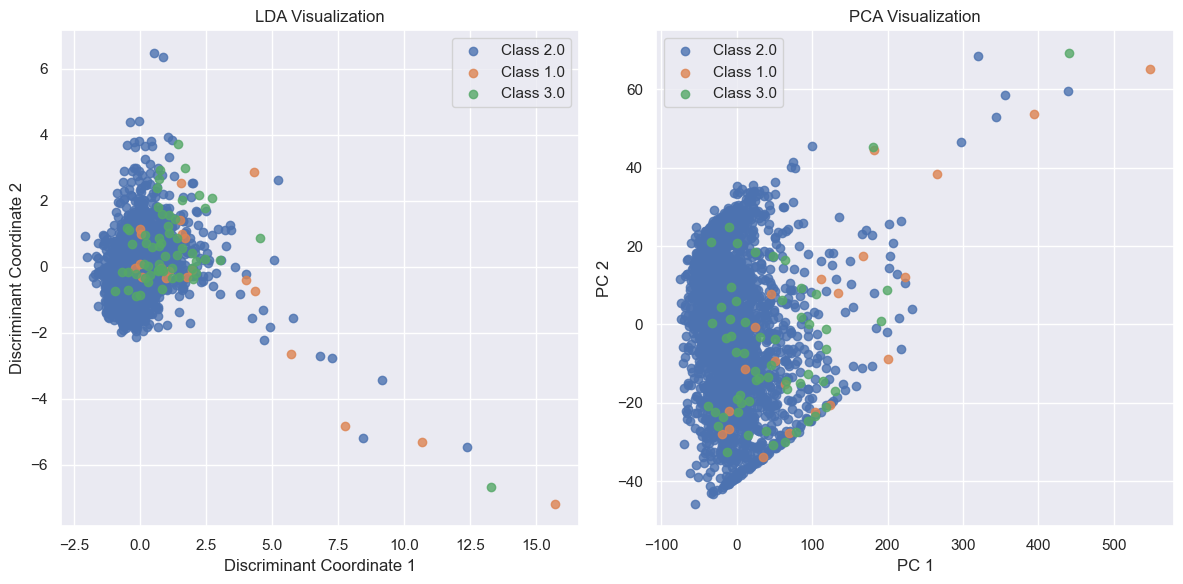

In [180]:
# Apply Dimensionality Reduction
lda = LinearDiscriminantAnalysis(n_components=2
                            )
X_r_lda = lda.fit_transform(X, y)

pca = PCA(n_components=4)
X_r_pca = pca.fit_transform(X)

# Visualize the Results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for class_label in y.unique():
    mask = (y == class_label)
    plt.scatter(X_r_lda[mask, 0], X_r_lda[mask, 1], label=f'Class {class_label}', alpha=0.8)
plt.title('LDA Visualization')
plt.xlabel('Discriminant Coordinate 1')
plt.ylabel('Discriminant Coordinate 2')
plt.legend()

plt.subplot(1, 2, 2)
for class_label in y.unique():
    mask = (y == class_label)
    plt.scatter(X_r_pca[mask, 0], X_r_pca[mask, 1], label=f'Class {class_label}', alpha=0.8)
plt.title('PCA Visualization')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

plt.tight_layout()
plt.show()